In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 62s 0us/step


In [12]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
y_test = y_test.reshape(-1,)

In [20]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [21]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

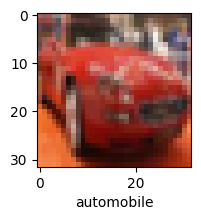

In [22]:
plot_sample(x_train,y_train,5)

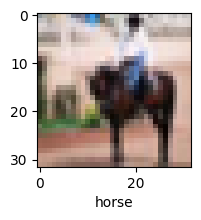

In [23]:
plot_sample(x_train,y_train,11)

In [24]:
x_train = x_train / 255.0
x_test  = x_test / 255.0

In [25]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')])

ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

ann.fit(x_train,y_train, epochs = 5)

C:\Users\Dhayanithi\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.3025 - loss: 1.9276
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4253 - loss: 1.6358
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4496 - loss: 1.5607
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4757 - loss: 1.4902
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4986 - loss: 1.4356


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
y_pred = ann.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [31]:
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report(y_test,y_pred_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.53      0.48      0.50      1000
           1       0.78      0.32      0.45      1000
           2       0.32      0.42      0.36      1000
           3       0.38      0.14      0.21      1000
           4       0.38      0.44      0.41      1000
           5       0.36      0.46      0.40      1000
           6       0.51      0.56      0.53      1000
           7       0.40      0.72      0.51      1000
           8       0.78      0.40      0.53      1000
           9       0.50      0.58      0.54      1000

    accuracy                           0.45     10000
   macro avg       0.49      0.45      0.44     10000
weighted avg       0.49      0.45      0.44     10000



In [33]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

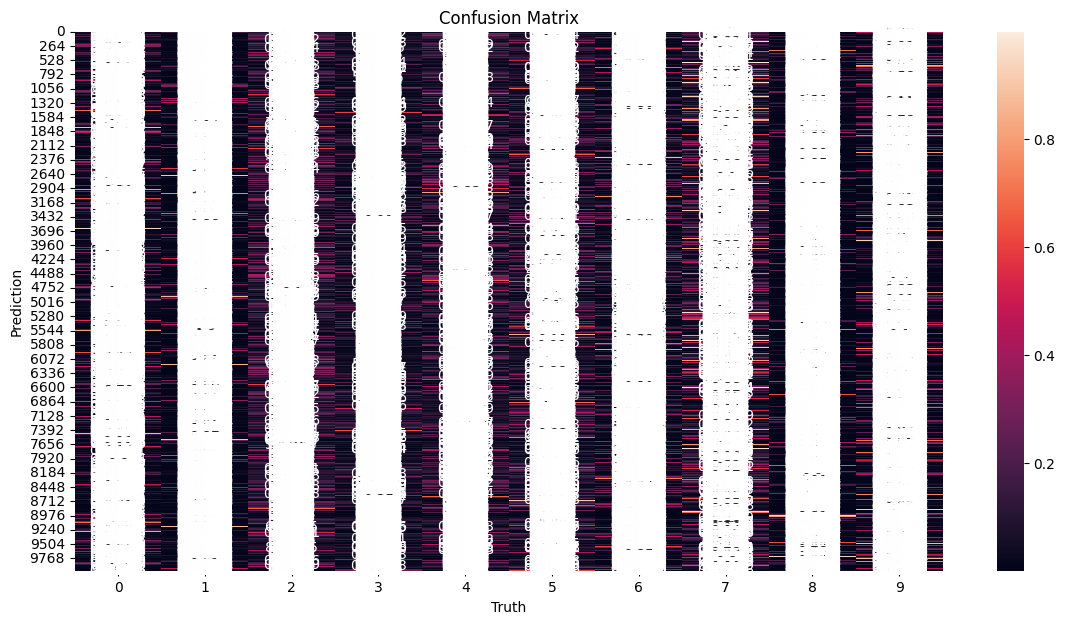

In [34]:
plt.figure(figsize = (14,7))
sns.heatmap(y_pred, annot = True)
plt.xlabel("Truth")
plt.ylabel("Prediction")
plt.title("Confusion Matrix")
plt.show

In [35]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

C:\Users\Dhayanithi\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [36]:
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']) 

In [37]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3881 - loss: 1.6875
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6072 - loss: 1.1218
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6587 - loss: 0.9720
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6993 - loss: 0.8678
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7204 - loss: 0.8092
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7400 - loss: 0.7474
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7591 - loss: 0.6970
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7772 - loss: 0.6467
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7895 - loss: 0.6103
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8028 - loss: 0.5627


In [38]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6828 - loss: 1.0020


[0.9936025142669678, 0.6851000189781189]

In [39]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[6.03486624e-05, 7.24486832e-04, 1.02696829e-02, 9.32245910e-01,
        3.47472756e-04, 4.60085198e-02, 3.60244443e-03, 1.12863735e-03,
        5.59521699e-03, 1.72226246e-05],
       [1.41900149e-04, 1.61568578e-02, 2.03340323e-06, 2.04064435e-07,
        1.50890662e-06, 9.67055058e-09, 2.30218173e-08, 9.48293249e-11,
        9.82784390e-01, 9.13093274e-04],
       [9.07810777e-03, 4.99011099e-01, 7.14906352e-03, 4.62641716e-02,
        3.41458456e-03, 7.42637785e-03, 2.20768168e-04, 7.33323907e-03,
        4.09317344e-01, 1.07852332e-02],
       [6.66733682e-01, 2.79816892e-03, 1.52945677e-02, 4.00781110e-02,
        4.84172627e-03, 7.64955301e-04, 1.14465955e-04, 3.83570441e-03,
        2.65015602e-01, 5.22966497e-04],
       [1.46134287e-08, 4.34470053e-07, 5.44627290e-03, 1.24955885e-01,
        8.34347785e-01, 5.15881833e-03, 3.00829709e-02, 7.24417941e-06,
        2.68307957e-07, 2.45224527e-07]], dtype=float32)

In [40]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [41]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

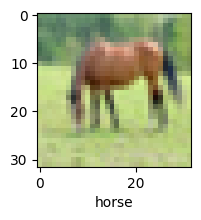

In [46]:
plot_sample(x_test,y_test,60)

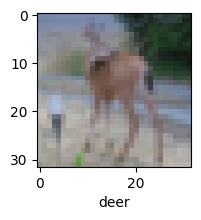

In [43]:
plot_sample(x_test,y_test,100)

In [47]:
classes[y_classes[60]]

'horse'